In [1]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
raw = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/subway_raw.xlsx')

In [3]:
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


## 가장 승객이 많이 타는 역은?

In [5]:
data_station = raw.pivot_table(index='역명', values = '승차총승객수', aggfunc='sum')
data_station = data_station.sort_values(by = '승차총승객수',ascending=False)
data_station

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147
...,...
신원,39930
백양리,32819
굴봉산,32109


## 노선별로 역별/요일별로 승객수를 비교해보기

In [6]:
# 하나의 노선(1호선) 데이터를 선택하여 역별/요일별 승객수 데이터를 정리

line = '1호선'
data_line = raw[raw['노선명'] == line]

df_pivot = data_line.pivot_table(index = ['역ID', '역명'], columns='요일',values = '승차총승객수', aggfunc='sum')
df_pivot = df_pivot[['월','화','수','목','금','토','일']]
df_pivot = df_pivot/10000 #만명단위로 표현하기위해
df_pivot


,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


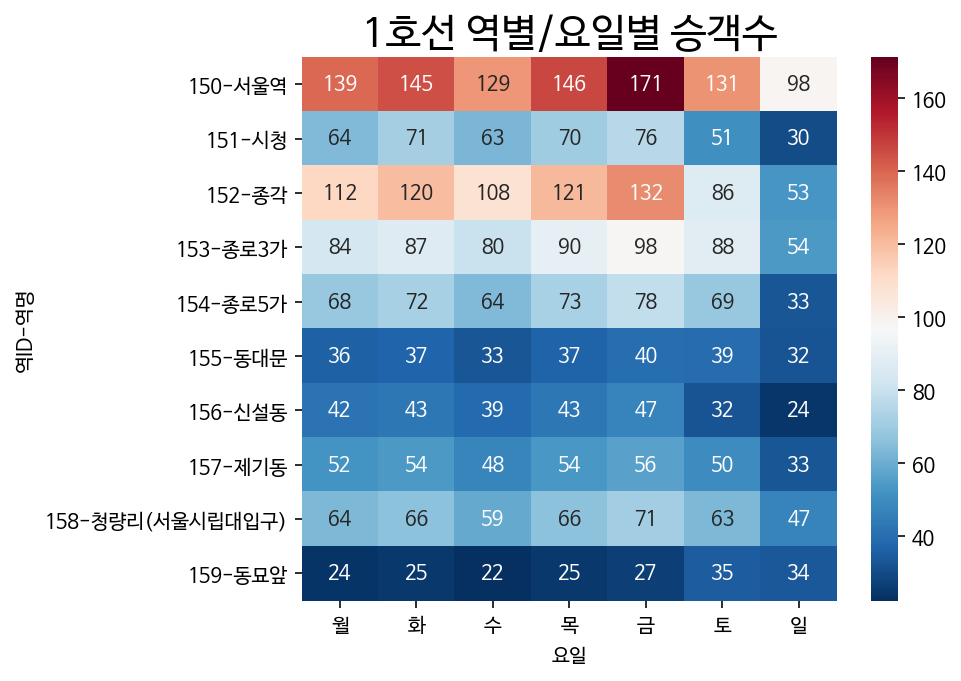

In [8]:
# 앞서 정리한 1호선의 역별/요일별 승객수를 히트맵을 이용해 표현 
fig, ax = plt.subplots( figsize=(6,5) )   # 그래프 사이즈 지정
plt.title(f"{line} 역별/요일별 승객수", fontsize = 20) # for title
sns.heatmap(df_pivot, cmap = "RdBu_r", 
           annot = True, fmt = '.0f')

In [9]:
# 1호선 ~ 9호선 노선 리스트를 정리
line_seoul_list = []

for line in raw['노선명'].unique():
  if line[1:] == '호선':
    line_seoul_list.append(line)

line_seoul_list



['2호선', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '1호선']

In [11]:
for line in line_seoul_list:

  # 데이터 정리하기
  data_line = raw[raw['노선명'] == line]
  df_pivot = data_line.pivot_table(index = ['역ID', '역명'], columns ='요일', values='승차총승객수', aggfunc='sum')
  df_pivot = df_pivot[['월','화','수','목','금','토','일']]
  df_pivot = df_pivot /10000

  fig,ax = plt.subplots(figsize=(6,len(df_pivot)/3))
  ax.set_title(f'{line} 역별/요일별 승객수')
  sns.heatmap(data=df_pivot,
              annot=True,
              fmt = '.0f',
              cmap ='RdBu_r'
              )


Output hidden; open in https://colab.research.google.com to view.